# ADNI Datasets
- Demographic
- Structural MRI
- Neurocognitive Scores
- ASL (Empty - ignore)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [17]:
def save_single_dataset(path, df, label):
    df[label] = pd.Series(demo_df[label])
    df = df.drop(columns='ID')
    df.to_csv(f'{path}.csv', encoding='utf-8', index=False)

## Demographics
- 4459 patient records, 8 features
- Non null features: ID, MCI, AD, Age, Exclude
- Null features: Gender, Weight, Height
- There are no patient records to exclude

In [18]:
demo_df = pd.read_csv('../datasets/adni_data/ADNI_Demo.csv')
print(demo_df.shape)
demo_df.info()
# df.isnull().sum().sort_values(ascending=True)

(4459, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       4459 non-null   object 
 1   MCI      4459 non-null   int64  
 2   AD       4459 non-null   int64  
 3   Gender   0 non-null      float64
 4   Age      4459 non-null   float64
 5   Exclude  4459 non-null   int64  
 6   Height   0 non-null      float64
 7   Weight   0 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 278.8+ KB


In [19]:
print("Removing all null columns..")
demo_df = demo_df.drop(['Gender', 'Height', 'Weight'], axis=1)
demo_df

Removing all null columns..


,ID,MCI,AD,Age,Exclude
0,183bl,0,1,72.400000,0
1,183m12,0,1,73.396578,0
2,183m24,0,1,74.415058,0
3,241bl,1,0,81.800000,0
4,241m06,0,1,82.301027,0
...,...,...,...,...,...
4454,5109bl,0,0,78.400000,0
4455,4959bl,0,1,77.500000,0
4456,2376m12,1,0,82.902053,0
4457,2376bl,1,0,81.900000,0


In [20]:
"""
Drop anywhere a row should be excluded
Then drop the exclude column
"""
exclude_rows = demo_df[demo_df['Exclude'] == 1]
print("Patients to exclude: " + str(exclude_rows.shape[0]))

demo_df = demo_df.drop(demo_df.loc[demo_df['Exclude'] == 1].index)
demo_df = demo_df.drop(['Exclude'], axis=1)
demo_df

Patients to exclude: 0


,ID,MCI,AD,Age
0,183bl,0,1,72.400000
1,183m12,0,1,73.396578
2,183m24,0,1,74.415058
3,241bl,1,0,81.800000
4,241m06,0,1,82.301027
...,...,...,...,...
4454,5109bl,0,0,78.400000
4455,4959bl,0,1,77.500000
4456,2376m12,1,0,82.902053
4457,2376bl,1,0,81.900000


In [57]:
demo_df.describe()

,MCI,AD,Age
count,4459.000000,4459.000000,4459.000000
mean,0.469388,0.228527,75.180110
std,0.499118,0.419931,7.157632
min,0.000000,0.000000,48.100000
25%,0.000000,0.000000,70.896235
50%,0.000000,0.000000,75.300000
75%,1.000000,0.000000,80.387337
max,1.000000,1.000000,95.620534


In [21]:
# Check how many patients have AD/don't have AD
have_ad = demo_df[demo_df["AD"] == 1].count()[0]
print(f"Patients with AD: {have_ad}")
have_mci = demo_df[demo_df["MCI"] == 1].count()[0]
print(f"Patients with MCI: {have_mci}")
no_ad = demo_df['ID'].count() - (have_mci+have_ad)
print(f"Patients without AD: {no_ad}")
print(f"Total patients: {no_ad+have_mci+have_ad}")

Patients with AD: 1019
Patients with MCI: 2093
Patients without AD: 1347
Total patients: 4459


## Structural MRI
- 4459 patient records, 146 features
- 109 null features
- 37 non-null features

In [22]:
mri_df = pd.read_csv('../datasets/adni_data/ADNI_sMRI.csv')
print(mri_df.shape)
mri_features = list(mri_df.columns[1:])
file = open('features/ALL_ADNI_MRI_features.csv', 'w')
for f in mri_features:
    file.write(f+"\n")
file.close()

(4459, 146)


In [23]:
# Display columns with all NAN values - 109 empty columns
mri_df[mri_df.columns[mri_df.isna().any()]]

,GreyMatter,WhiteMatter,CSF,DeepGreyMatter,Brainstem,Background,NonVentricularCSF,Pons,CerebellarVermalLobulesI-V,CerebellarVermalLobulesVI-VII,CerebellarVermalLobulesVIII-X,RightAnteriorCingulateGyrus,LeftAnteriorCingulateGyrus,RightAnteriorInsula,LeftAnteriorInsula,RightAnteriorOrbitalGyrus,LeftAnteriorOrbitalGyrus,RightAngularGyrus,LeftAngularGyrus,RightCalcarineCortex,LeftCalcarineCortex,RightCentralOperculum,LeftCentralOperculum,RightCuneus,LeftCuneus,RightEntorhinalArea,LeftEntorhinalArea,RightFrontalOperculum,LeftFrontalOperculum,RightFrontalPole,LeftFrontalPole,RightFusiformGyrus,LeftFusiformGyrus,RightGyrusRectus,LeftGyrusRectus,RightInferiorOccipitalGyrus,LeftInferiorOccipitalGyrus,RightInferiorTemporalGyrus,LeftInferiorTemporalGyrus,RightLingualGyrus,LeftLingualGyrus,RightLateralOrbitalGyrus,LeftLateralOrbitalGyrus,RightMiddleCingulateGyrus,LeftMiddleCingulateGyrus,RightMedialFrontalCortex,LeftMedialFrontalCortex,RightMiddleFrontalGyrus,LeftMiddleFrontalGyrus,RightMiddleOccipitalGyrus,LeftMiddleOccipitalGyrus,RightMedialOrbitalGyrus,LeftMedialOrbitalGyrus,RightPostcentralGyrusMedialSegment,LeftPostcentralGyrusMedialSegment,RightPrecentralGyrusMedialSegment,LeftPrecentralGyrusMedialSegment,RightSuperiorFrontalGyrusMedialSegment,LeftSuperiorFrontalGyrusMedialSegment,RightMiddleTemporalGyrus,LeftMiddleTemporalGyrus,RightOccipitalPole,LeftOccipitalPole,RightOccipitalFusiformGyrus,LeftOccipitalFusiformGyrus,RightOpercularInferiorFrontalGyrus,LeftOpercularInferiorFrontalGyrus,RightOrbitalInferiorFrontalGyrus,LeftOrbitalInferiorFrontalGyrus,RightPosteriorCingulateGyrus,LeftPosteriorCingulateGyrus,RightPrecuneus,LeftPrecuneus,RightParahippocampalGyrus,LeftParahippocampalGyrus,RightPosteriorInsula,LeftPosteriorInsula,RightParietalOperculum,LeftParietalOperculum,RightPostcentralGyrus,LeftPostcentralGyrus,RightPosteriorOrbitalGyrus,LeftPosteriorOrbitalGyrus,RightPlanumPolare,LeftPlanumPolare,RightPrecentralGyrus,LeftPrecentralGyrus,RighPlanumTemporale,LeftPlanumTemporale,RightSubcallosalArea,LeftSubcallosalArea,RightSuperiorFrontalGyrus,LeftSuperiorFrontalGyrus,RightSupplementaryMotorCortex,LeftSupplementaryMotorCortex,RightSupramarginalGyrus,LeftSupramarginalGyrus,RightSuperiorOccipitalGyrus,LeftSuperiorOccipitalGyrus,RightSuperiorParietalLobule,LeftSuperiorParietalLobule,RightSuperiorTemporalGyrus,LeftSuperiorTemporalGyrus,RightTemporalPole,LeftTemporalPole,RightTriangularInferiorFrontalGyrus,LeftTriangularInferiorFrontalGyrus,RightTransverseTemporalGyrus,LeftTransverseTemporalGyrus
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [24]:
# Remove all empty columns - 37 features left
mri_df = mri_df.dropna(axis=1, how='all')
mri_df

,ID,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,Unnamed: 25,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,183bl,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,49406.06404,48531.51062,14150.93817,13970.35787,212469.1675,216044.5565,2087.669686,2373.571682,2484.542816,2266.333213,2042.474170,40609.68486,42080.45593,1273.242443,1280.808657,3475.716812,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.253600
1,183m12,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,49051.52986,48609.03055,14244.22528,13408.07008,212912.1734,217297.7507,1976.202718,2317.504883,2375.575395,2645.568174,2270.567059,47221.55652,47857.12273,1158.702294,1138.141923,2992.486830,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.602410
2,183m24,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,50138.04210,49440.57359,12816.97872,12117.59603,215802.2776,224272.3440,2000.524654,2235.465657,2434.843120,3523.409817,2752.497058,55126.10556,55096.08309,1039.704610,849.797324,2639.761645,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.821720
3,241bl,1214750.869,2954.135320,2840.931017,257.332709,230.605449,1033.417235,1134.362340,16405.23630,3094.177326,3592.276261,49009.95316,44388.23562,13986.30883,14151.09012,227697.2580,219460.7338,2143.040293,2573.327088,3116.818187,2528.045367,1511.084173,31066.90543,35451.72226,1665.483798,1457.519210,2982.961001,2993.232221,5994.747683,6322.101395,4008.205437,4395.198489,395.276294,372.635433,242753.8721,251966.4935,10816.146570
4,241m06,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,46416.35333,41221.03781,15843.74808,15833.62755,236596.3947,227270.1608,2079.715023,2540.797779,2991.651180,2416.848461,1450.174371,30970.57070,35193.00922,1795.360706,1565.853146,2674.867629,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.303170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,5109bl,1214750.869,3897.497914,3170.369046,348.100232,331.390590,1136.878336,1099.618949,16413.33070,4192.978343,4742.735924,48509.02311,48645.19112,14063.80981,13350.79592,232578.0739,228408.2400,3070.214984,3365.695413,3065.025654,1646.885652,1794.573974,28509.13914,29798.89512,1063.605002,1122.763359,3202.542889,3153.659404,5548.223670,6613.074111,4180.108806,4264.902452,411.098694,520.282189,239684.5495,244014.6299,8832.965541
4455,4959bl,1214750.869,2406.687517,2577.421885,286.750805,294.593408,1126.900916,1076.690228,19722.07312,4100.419322,3726.588581,51327.94336,51578.99680,14456.80190,13634.50047,225740.0414,216568.5229,2061.883421,3247.919366,3119.643228,2071.979645,1981.564349,29782.78055,29562.91724,1103.463252,1039.911124,3947.533637,3885.063248,5714.913795,6176.816066,4131.609445,4335.787556,471.998496,492.010655,248666.2235,245058.8064,9273.111774
4456,2376m12,1214750.869,1385.568343,1375.924216,366.649059,381.545791,947.449411,1129.740642,17965.97610,3827.254748,3697.231244,50855.20609,48679.93871,12358.863

In [25]:
# how many columns have some nan values
null_rows = mri_df.isnull().any(axis=1)
total_null = sum(null_rows)
print("Rows containing at least one NAN values: " + str(total_null))

Rows containing at least one NAN values: 0


### Feature engineering
- This dataset is already normalised against the same template, so all volumes are factored down to the same brain size, values are relative to the size of regions
- See ADNI_MRI_features.csv for list of all features

In [26]:
# feature 'Unnamed: 25', not clear what this is referring to
mri_df = mri_df.drop(['Unnamed: 25'], axis=1)

In [27]:
mri_df

,ID,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,183bl,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,49406.06404,48531.51062,14150.93817,13970.35787,212469.1675,216044.5565,2373.571682,2484.542816,2266.333213,2042.474170,40609.68486,42080.45593,1273.242443,1280.808657,3475.716812,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.253600
1,183m12,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,49051.52986,48609.03055,14244.22528,13408.07008,212912.1734,217297.7507,2317.504883,2375.575395,2645.568174,2270.567059,47221.55652,47857.12273,1158.702294,1138.141923,2992.486830,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.602410
2,183m24,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,50138.04210,49440.57359,12816.97872,12117.59603,215802.2776,224272.3440,2235.465657,2434.843120,3523.409817,2752.497058,55126.10556,55096.08309,1039.704610,849.797324,2639.761645,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.821720
3,241bl,1214750.869,2954.135320,2840.931017,257.332709,230.605449,1033.417235,1134.362340,16405.23630,3094.177326,3592.276261,49009.95316,44388.23562,13986.30883,14151.09012,227697.2580,219460.7338,2573.327088,3116.818187,2528.045367,1511.084173,31066.90543,35451.72226,1665.483798,1457.519210,2982.961001,2993.232221,5994.747683,6322.101395,4008.205437,4395.198489,395.276294,372.635433,242753.8721,251966.4935,10816.146570
4,241m06,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,46416.35333,41221.03781,15843.74808,15833.62755,236596.3947,227270.1608,2540.797779,2991.651180,2416.848461,1450.174371,30970.57070,35193.00922,1795.360706,1565.853146,2674.867629,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.303170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,5109bl,1214750.869,3897.497914,3170.369046,348.100232,331.390590,1136.878336,1099.618949,16413.33070,4192.978343,4742.735924,48509.02311,48645.19112,14063.80981,13350.79592,232578.0739,228408.2400,3365.695413,3065.025654,1646.885652,1794.573974,28509.13914,29798.89512,1063.605002,1122.763359,3202.542889,3153.659404,5548.223670,6613.074111,4180.108806,4264.902452,411.098694,520.282189,239684.5495,244014.6299,8832.965541
4455,4959bl,1214750.869,2406.687517,2577.421885,286.750805,294.593408,1126.900916,1076.690228,19722.07312,4100.419322,3726.588581,51327.94336,51578.99680,14456.80190,13634.50047,225740.0414,216568.5229,3247.919366,3119.643228,2071.979645,1981.564349,29782.78055,29562.91724,1103.463252,1039.911124,3947.533637,3885.063248,5714.913795,6176.816066,4131.609445,4335.787556,471.998496,492.010655,248666.2235,245058.8064,9273.111774
4456,2376m12,1214750.869,1385.568343,1375.924216,366.649059,381.545791,947.449411,1129.740642,17965.97610,3827.254748,3697.231244,50855.20609,48679.93871,12358.86319,12209.72365,203240.7720,202776.1317,2588.845456,2809.454871,1013.580571,728.992704,37933.62529,28

In [28]:
# Extract a list of non nan clolumns
mri_features = list(mri_df.columns[1:])
file = open('features/ADNI_MRI_features.csv', 'w')
for f in mri_features:
    file.write(f+"\n")
file.close()

#### Save AD/NC MRI dataset

In [29]:
adnc_mri_df = mri_df.copy()
save_single_dataset('../training/AD_NC/data/sMRI_AD_NC', adnc_mri_df, 'AD')

#### Save MCI/NC MRI dataset

In [30]:
mcinc_mri_df = mri_df.copy()
save_single_dataset('../training/MCI_NC/data/sMRI_MCI_NC', mcinc_mri_df, 'MCI')

## Neurocognitive Scores
- 4459 rows, 6 features
- CDR column completely missing, dropped from dataset
- 104 rows with some NAN values
- Null features: CDR Score
- Non-null features: MMSE, CDRSB, ADAS11, ADAS13
- Imputation (iterative regression): MMSE, CDRSB, ADAS11, ADAS13

In [60]:
neuro_df = pd.read_csv('../datasets/adni_data/ADNI_Neuro.csv')
print(neuro_df.shape)
neuro_df.info()

(4459, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4459 non-null   object 
 1   MMSE    4449 non-null   float64
 2   CDR     0 non-null      float64
 3   CDRSB   4427 non-null   float64
 4   ADAS11  4431 non-null   float64
 5   ADAS13  4388 non-null   float64
dtypes: float64(5), object(1)
memory usage: 209.1+ KB


In [61]:
# Get null count for each column
neuro_df.isnull().sum().sort_values(ascending=True)

ID           0
MMSE        10
ADAS11      28
CDRSB       32
ADAS13      71
CDR       4459
dtype: int64

In [62]:
# Drop CDR since it is all NAN
neuro_df = neuro_df.drop(['CDR'], axis=1)
neuro_df

,ID,MMSE,CDRSB,ADAS11,ADAS13
0,1001bl,22.0,4.5,26.67,38.67
1,1001m12,12.0,6.0,38.33,48.33
2,1002bl,30.0,0.0,4.33,9.33
3,1002m12,29.0,0.0,4.33,9.33
4,1002m24,30.0,2.0,3.33,5.33
...,...,...,...,...,...
4454,997m18,23.0,4.5,20.00,34.00
4455,997m24,22.0,5.5,19.33,30.33
4456,997m36,23.0,4.5,25.33,37.33
4457,999bl,25.0,4.0,22.67,33.67


In [63]:
neuro_df.describe()

,MMSE,CDRSB,ADAS11,ADAS13
count,4449.000000,4427.000000,4431.000000,4388.000000
mean,26.701731,1.967811,11.216719,17.419690
std,3.649406,2.336819,7.907640,10.850247
min,2.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,5.670000,9.000000
50%,28.000000,1.000000,9.000000,15.000000
75%,29.000000,3.000000,14.670000,23.670000
max,30.000000,17.000000,66.000000,73.000000


### Imputation

In [34]:
"""
Imputing NaN values using linear regression.
SKlearn Multivariate imputer estimates each feature from all others given.
"""
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

itr = IterativeImputer(estimator=LinearRegression())

<AxesSubplot:xlabel='MMSE', ylabel='CDRSB'>

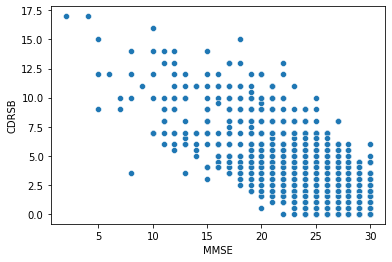

In [35]:
# Correlation between MMSE and CDRSB: strong negative correlation
sns.scatterplot(x=neuro_df['MMSE'], y=neuro_df['CDRSB'])

In [36]:
# Strong correlation between MMSE and CDRSB justifies use of iterative imputer.

neuro_df[['MMSE', 'CDRSB']] = itr.fit_transform(neuro_df[['MMSE', 'CDRSB']])

# Check nan value count in MMSE, CDRSB
# NAN Value count...
print(neuro_df[['MMSE', 'CDRSB']].isnull().sum())

# TODO: Want to be able to see what the new nan values are after imputation
neuro_df

MMSE     0
CDRSB    0
dtype: int64


,ID,MMSE,CDRSB,ADAS11,ADAS13
0,1001bl,22.0,4.5,26.67,38.67
1,1001m12,12.0,6.0,38.33,48.33
2,1002bl,30.0,0.0,4.33,9.33
3,1002m12,29.0,0.0,4.33,9.33
4,1002m24,30.0,2.0,3.33,5.33
...,...,...,...,...,...
4454,997m18,23.0,4.5,20.00,34.00
4455,997m24,22.0,5.5,19.33,30.33
4456,997m36,23.0,4.5,25.33,37.33
4457,999bl,25.0,4.0,22.67,33.67


<AxesSubplot:xlabel='ADAS11', ylabel='CDRSB'>

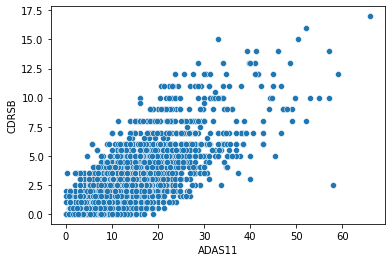

In [64]:
sns.scatterplot(x=neuro_df['ADAS11'], y=neuro_df['CDRSB'])

<AxesSubplot:xlabel='ADAS13', ylabel='CDRSB'>

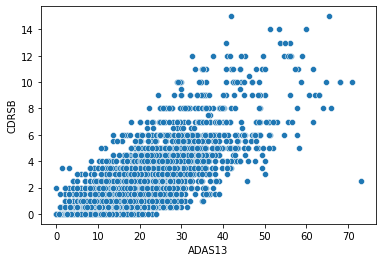

In [65]:
sns.scatterplot(x=neuro_df['ADAS13'], y=neuro_df['CDRSB'])

In [38]:
# Now we want to fill out ADAS11 and ADAS13 based on CDRSB
neuro_df[['CDRSB', 'ADAS11', 'ADAS13']] = itr.fit_transform(neuro_df[['CDRSB', 'ADAS11', 'ADAS13']])

# Check nan value count in MMSE, CDRSB
print(neuro_df[['ADAS11', 'ADAS13']].isnull().sum())

ADAS11    0
ADAS13    0
dtype: int64


/usr/local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [39]:
# Want to drop CDRSB as it is used for patients who have AD
neuro_df = neuro_df.drop(['CDRSB'], axis=1)
neuro_df

,ID,MMSE,ADAS11,ADAS13
0,1001bl,22.0,26.67,38.67
1,1001m12,12.0,38.33,48.33
2,1002bl,30.0,4.33,9.33
3,1002m12,29.0,4.33,9.33
4,1002m24,30.0,3.33,5.33
...,...,...,...,...
4454,997m18,23.0,20.00,34.00
4455,997m24,22.0,19.33,30.33
4456,997m36,23.0,25.33,37.33
4457,999bl,25.0,22.67,33.67


In [59]:
neuro_df.describe()

,MMSE,ADAS11,ADAS13
count,4459.000000,4459.000000,4459.000000
mean,26.694390,11.235172,17.580846
std,3.654175,7.909281,11.150400
min,2.000000,0.000000,0.000000
25%,25.000000,5.670000,9.000000
50%,28.000000,9.330000,15.330000
75%,29.000000,15.000000,24.000000
max,30.000000,66.000000,94.135797


#### AD/NC Dataset

In [40]:
adnc_neuro_df = neuro_df.copy()
save_single_dataset('../training/MCI_NC/data/Neuro_AD_NC', adnc_neuro_df, 'AD')

#### MCI/NC Neuro dataset

In [41]:
mcinc_neuro_df = neuro_df.copy()
save_single_dataset('../training/MCI_NC/data/Neuro_MCI_NC', mcinc_neuro_df, 'MCI')

## ASL - Arterial Spin Labelling
- All empty

In [42]:
df = pd.read_csv('../datasets/adni_data/ADNI_ASL.csv')
print(df.shape)
df.isnull().sum().sort_values(ascending=True)

(4459, 138)


ID                                                           0
 Right PCu precuneus                                      4459
 Left PCgG posterior cingulate gyrus                      4459
 Right PCgG posterior cingulate gyrus                     4459
 Left OrIFG orbital part of the inferior frontal gyrus    4459
                                                          ... 
 Left AnG angular gyrus                                   4459
 Right Calc calcarine cortex                              4459
 Left Calc calcarine cortex                               4459
 Left AIns anterior insula                                4459
 Left TTG transverse temporal gyrus                       4459
Length: 138, dtype: int64

## Combine Datasets

- Joined on patient ID, then drop MCI, ID column for models
- 43 features
- Classification on AD column

In [43]:
demo_df

,ID,MCI,AD,Age
0,183bl,0,1,72.400000
1,183m12,0,1,73.396578
2,183m24,0,1,74.415058
3,241bl,1,0,81.800000
4,241m06,0,1,82.301027
...,...,...,...,...
4454,5109bl,0,0,78.400000
4455,4959bl,0,1,77.500000
4456,2376m12,1,0,82.902053
4457,2376bl,1,0,81.900000


In [44]:
mri_df

,ID,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,183bl,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,49406.06404,48531.51062,14150.93817,13970.35787,212469.1675,216044.5565,2373.571682,2484.542816,2266.333213,2042.474170,40609.68486,42080.45593,1273.242443,1280.808657,3475.716812,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.253600
1,183m12,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,49051.52986,48609.03055,14244.22528,13408.07008,212912.1734,217297.7507,2317.504883,2375.575395,2645.568174,2270.567059,47221.55652,47857.12273,1158.702294,1138.141923,2992.486830,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.602410
2,183m24,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,50138.04210,49440.57359,12816.97872,12117.59603,215802.2776,224272.3440,2235.465657,2434.843120,3523.409817,2752.497058,55126.10556,55096.08309,1039.704610,849.797324,2639.761645,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.821720
3,241bl,1214750.869,2954.135320,2840.931017,257.332709,230.605449,1033.417235,1134.362340,16405.23630,3094.177326,3592.276261,49009.95316,44388.23562,13986.30883,14151.09012,227697.2580,219460.7338,2573.327088,3116.818187,2528.045367,1511.084173,31066.90543,35451.72226,1665.483798,1457.519210,2982.961001,2993.232221,5994.747683,6322.101395,4008.205437,4395.198489,395.276294,372.635433,242753.8721,251966.4935,10816.146570
4,241m06,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,46416.35333,41221.03781,15843.74808,15833.62755,236596.3947,227270.1608,2540.797779,2991.651180,2416.848461,1450.174371,30970.57070,35193.00922,1795.360706,1565.853146,2674.867629,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.303170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,5109bl,1214750.869,3897.497914,3170.369046,348.100232,331.390590,1136.878336,1099.618949,16413.33070,4192.978343,4742.735924,48509.02311,48645.19112,14063.80981,13350.79592,232578.0739,228408.2400,3365.695413,3065.025654,1646.885652,1794.573974,28509.13914,29798.89512,1063.605002,1122.763359,3202.542889,3153.659404,5548.223670,6613.074111,4180.108806,4264.902452,411.098694,520.282189,239684.5495,244014.6299,8832.965541
4455,4959bl,1214750.869,2406.687517,2577.421885,286.750805,294.593408,1126.900916,1076.690228,19722.07312,4100.419322,3726.588581,51327.94336,51578.99680,14456.80190,13634.50047,225740.0414,216568.5229,3247.919366,3119.643228,2071.979645,1981.564349,29782.78055,29562.91724,1103.463252,1039.911124,3947.533637,3885.063248,5714.913795,6176.816066,4131.609445,4335.787556,471.998496,492.010655,248666.2235,245058.8064,9273.111774
4456,2376m12,1214750.869,1385.568343,1375.924216,366.649059,381.545791,947.449411,1129.740642,17965.97610,3827.254748,3697.231244,50855.20609,48679.93871,12358.86319,12209.72365,203240.7720,202776.1317,2588.845456,2809.454871,1013.580571,728.992704,37933.62529,28

In [45]:
final_df = pd.merge(demo_df, neuro_df, on='ID', how='left')
final_df = pd.merge(final_df, mri_df, on='ID', how='left')
final_df = final_df.drop(['ID'],axis=1)
final_df

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,0,1,72.400000,21.0,12.67,22.67,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,49406.06404,48531.51062,14150.93817,13970.35787,212469.1675,216044.5565,2373.571682,2484.542816,2266.333213,2042.474170,40609.68486,42080.45593,1273.242443,1280.808657,3475.716812,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.253600
1,0,1,73.396578,22.0,12.67,22.67,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,49051.52986,48609.03055,14244.22528,13408.07008,212912.1734,217297.7507,2317.504883,2375.575395,2645.568174,2270.567059,47221.55652,47857.12273,1158.702294,1138.141923,2992.486830,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.602410
2,0,1,74.415058,19.0,33.67,48.67,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,50138.04210,49440.57359,12816.97872,12117.59603,215802.2776,224272.3440,2235.465657,2434.843120,3523.409817,2752.497058,55126.10556,55096.08309,1039.704610,849.797324,2639.761645,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.821720
3,1,0,81.800000,27.0,11.33,15.33,1214750.869,2954.135320,2840.931017,257.332709,230.605449,1033.417235,1134.362340,16405.23630,3094.177326,3592.276261,49009.95316,44388.23562,13986.30883,14151.09012,227697.2580,219460.7338,2573.327088,3116.818187,2528.045367,1511.084173,31066.90543,35451.72226,1665.483798,1457.519210,2982.961001,2993.232221,5994.747683,6322.101395,4008.205437,4395.198489,395.276294,372.635433,242753.8721,251966.4935,10816.146570
4,0,1,82.301027,25.0,7.00,13.00,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,46416.35333,41221.03781,15843.74808,15833.62755,236596.3947,227270.1608,2540.797779,2991.651180,2416.848461,1450.174371,30970.57070,35193.00922,1795.360706,1565.853146,2674.867629,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.303170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,0,0,78.400000,27.0,9.00,12.00,1214750.869,3897.497914,3170.369046,348.100232,331.390590,1136.878336,1099.618949,16413.33070,4192.978343,4742.735924,48509.02311,48645.19112,14063.80981,13350.79592,232578.0739,228408.2400,3365.695413,3065.025654,1646.885652,1794.573974,28509.13914,29798.89512,1063.605002,1122.763359,3202.542889,3153.659404,5548.223670,6613.074111,4180.108806,4264.902452,411.098694,520.282189,239684.5495,244014.6299,8832.965541
4455,0,1,77.500000,25.0,16.00,24.00,1214750.869,2406.687517,2577.421885,286.750805,294.593408,1126.900916,1076.690228,19722.07312,4100.419322,3726.588581,51327.94336,51578.99680,14456.80190,13634.50047,225740.0414,216568.5229,3247.919366,3119.643228,2071.979645,1981.564349,29782.78055,29562.91724,1103.463252,1039.911124,3947.533637,3885.063248,5714.913795,6176.816066,4131.609445,4335.787556,471.998496,492.010655,248666.2235,245058.8064,9273.111774
4456,1,0,82.902053,30.0,9.00,15.00,1214750.869,1

In [46]:
# Save AD/HC dataset
ad_hc_df = final_df.drop(final_df[final_df.MCI == 1].index)
ad_hc_df.to_csv('../training/AD_NC/data/ADNI_AD_NC.csv', encoding='utf-8', index=False)
ad_hc_df.head()

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
0,0,1,72.400000,21.0,12.67,22.67,1214750.869,2706.384202,3609.184822,291.551435,252.005358,835.108228,912.182725,17367.08342,6505.632312,5574.584495,49406.06404,48531.51062,14150.93817,13970.35787,212469.1675,216044.5565,2373.571682,2484.542816,2266.333213,2042.474170,40609.68486,42080.45593,1273.242443,1280.808657,3475.716812,3592.236503,5822.857187,6127.523393,3853.724849,4152.741615,473.947627,490.895945,232505.2075,254897.6692,10233.25360
1,0,1,73.396578,22.0,12.67,22.67,1214750.869,2996.197727,3635.575129,234.388234,238.099130,800.650949,819.406019,17141.13145,7376.158593,5921.186362,49051.52986,48609.03055,14244.22528,13408.07008,212912.1734,217297.7507,2317.504883,2375.575395,2645.568174,2270.567059,47221.55652,47857.12273,1158.702294,1138.141923,2992.486830,3260.574014,5330.552084,5739.352444,3980.588189,4250.580968,420.033343,238.099130,227700.1954,247076.2894,10115.60241
2,0,1,74.415058,19.0,33.67,48.67,1214750.869,3072.165927,4002.862747,191.821471,172.981862,750.158965,817.860661,17073.72283,8844.239201,6858.826533,50138.04210,49440.57359,12816.97872,12117.59603,215802.2776,224272.3440,2235.465657,2434.843120,3523.409817,2752.497058,55126.10556,55096.08309,1039.704610,849.797324,2639.761645,2756.325428,5240.030635,5520.106101,4061.094265,4344.998101,424.949035,334.680108,212094.4008,235671.8185,10231.82172
4,0,1,82.301027,25.0,7.00,13.00,1214750.869,3022.121600,2896.213470,195.010691,142.122747,919.989054,1123.161465,16199.16377,3109.397590,3475.042637,46416.35333,41221.03781,15843.74808,15833.62755,236596.3947,227270.1608,2540.797779,2991.651180,2416.848461,1450.174371,30970.57070,35193.00922,1795.360706,1565.853146,2674.867629,2833.204993,5583.160444,5788.291668,4031.563103,4246.814859,552.385195,454.988672,238270.3091,244937.4547,10110.30317
5,0,1,82.793840,25.0,10.67,15.67,1214750.869,2926.762714,2879.883925,199.507404,20.386822,911.846955,958.616723,16196.73059,2900.270747,3124.198730,46268.05641,40176.43034,17128.96437,17788.31998,243891.6962,237909.9627,2165.582007,3059.004507,2552.277505,1449.099679,30742.89173,35063.80782,1691.343096,1540.676849,2798.554677,2521.751782,5833.138606,5973.556932,4044.113197,4284.285225,433.465267,486.449200,229719.9112,234663.5521,10331.10389


In [47]:
# Save MCI/HC dataset
mci_hc_df = final_df.drop(final_df[final_df.AD == 1].index)
mci_hc_df.to_csv('../training/MCI_NC/data/ADNI_MCI_NC.csv', encoding='utf-8', index=False)
mci_hc_df.head()

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
3,1,0,81.800000,27.0,11.33,15.330000,1214750.869,2954.135320,2840.931017,257.332709,230.605449,1033.417235,1134.362340,16405.23630,3094.177326,3592.276261,49009.95316,44388.23562,13986.30883,14151.09012,227697.2580,219460.7338,2573.327088,3116.818187,2528.045367,1511.084173,31066.90543,35451.72226,1665.483798,1457.519210,2982.961001,2993.232221,5994.747683,6322.101395,4008.205437,4395.198489,395.276294,372.635433,242753.8721,251966.4935,10816.14657
13,0,0,74.693840,30.0,5.67,10.182521,1214750.869,1684.503572,1763.842785,362.060204,305.165029,950.038587,801.797100,17988.57332,2684.602524,2444.922363,51057.04651,49962.18384,13767.70871,13824.60389,233051.5957,229734.2191,3193.241693,2481.128384,863.864564,1169.029593,18867.95475,18554.10767,1313.853674,1325.953135,3736.331999,3517.340993,6379.556214,6353.694771,3557.056781,3758.776038,368.987376,465.505977,255909.4169,250151.8284,10424.47065
14,0,0,73.700000,29.0,8.67,14.670000,1214750.869,1687.408033,1806.624082,368.218574,307.737340,1025.239634,852.344193,18144.46199,2726.435182,2543.153146,50706.06908,49782.85706,13355.50644,13763.52497,227166.6860,224530.1454,3054.945712,2527.619212,874.771884,1109.894978,18464.33234,18127.18163,1296.669851,1284.536837,3950.490786,3627.127595,6642.365263,6562.765342,3689.447164,3698.087340,423.552468,499.659553,261902.8600,255698.2024,10554.80251
15,0,0,76.708898,30.0,6.67,11.670000,1214750.869,1927.014586,1759.162301,354.591422,283.673138,928.881394,700.572661,17981.02550,2549.725266,2385.391121,50656.57877,49784.82085,13357.35704,13698.15365,235180.9555,232686.5946,3006.342732,2338.636900,1056.923153,1383.832373,21757.19269,21127.53831,1326.708898,1314.673158,3608.314906,3296.959566,6151.096476,6282.563792,3682.658748,3895.506184,294.042391,392.642878,251658.9022,245572.1506,10366.56818
16,0,0,75.698631,29.0,7.00,11.000000,1214750.869,1731.507391,1660.914388,358.027096,284.028693,958.665869,697.094402,17685.15796,2535.273619,2421.698957,50568.42808,49336.04175,13710.96516,13905.44106,240048.5161,237786.9630,3022.429768,2361.506227,836.531690,1189.312630,19666.27190,19334.10743,1344.212271,1280.522104,3569.778647,3168.677854,6413.102829,6407.948711,3660.988120,3753.946312,271.971740,388.951801,248189.8130,243893.8560,10466.54019


In [48]:
# final_df = final_df.drop(['MCI'],axis=1)
# final_df.to_csv('ADNI_preprocessed.csv', encoding='utf-8', index=False)

### Balance Dataset
- Currently labels are AD (1019), No AD (3440)
- TODO: apply oversampling method to balance data, either in this notebook or separate script https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### Final Dataset Summary

In [49]:
have_ad = final_df[final_df["AD"] == 1]
have_mci = final_df[final_df["MCI"] == 1]
no_ad = final_df.loc[(final_df["AD"] == 0) & (final_df["MCI"] == 0)]
print(f"Patients with AD: {have_ad.count()[0]}")
print(f"Patients with MCI: {have_mci.count()[0]}")
print(f"Patients without AD: {no_ad.count()[0]}")
print(f"Total patients: {no_ad.count()[0]+have_mci.count()[0]+have_ad.count()[0]}")

Patients with AD: 1019
Patients with MCI: 2093
Patients without AD: 1347
Total patients: 4459


In [50]:
have_mci.describe()

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
count,2093.0,2093.0,2093.000000,2093.000000,2093.000000,2093.000000,2.093000e+03,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,1.0,0.0,74.303676,27.445526,10.176208,16.456073,1.214751e+06,2052.385873,2326.984125,332.897769,324.232297,1055.951539,1024.990825,18776.974311,3682.100845,3441.228285,49012.040899,48404.630647,16035.726438,16020.339303,222229.905832,218733.249073,3084.031547,2906.723488,1376.045076,1256.156221,21998.753809,24437.075773,1322.335111,1327.406248,3817.108384,3818.202722,6363.942604,6513.920309,4164.254672,4352.549902,433.560484,436.494777,256388.797737,255315.376406,9736.018703
std,0.0,0.0,7.621612,2.168098,4.958281,7.272765,2.328863e-10,731.383067,673.532112,87.142752,82.129427,194.775700,196.128424,1551.294401,1184.579783,1009.861035,5169.229782,5155.269040,3614.399549,3973.400129,13478.586622,13598.049587,481.685779,496.085899,639.673542,552.236495,10622.928399,11854.605753,195.339546,205.654763,674.065700,677.629173,674.948637,697.480726,325.481206,344.050134,121.920136,110.485926,15450.137000,15137.155080,1135.437127
min,1.0,0.0,48.100000,8.000000,0.000000,0.000000,1.214751e+06,500.267577,937.189928,14.479988,13.548527,363.185206,354.270186,14061.935160,1026.791056,1339.761530,32251.726820,29105.723620,6709.524703,5575.466067,186335.313800,178834.537100,1577.631882,1510.894967,409.210874,300.084768,4482.778761,4127.400600,209.784353,477.511697,1083.024918,1314.161602,2739.062073,2020.409313,3206.096315,3147.017104,143.637336,160.472128,189503.544500,185229.660800,5695.769796
25%,1.0,0.0,69.021218,26.000000,6.670000,11.000000,1.214751e+06,1501.875646,1856.738110,279.243403,278.156250,931.378090,900.984809,17729.494900,2963.028497,2856.221845,45663.316850,45117.406400,13539.919460,13324.313770,213166.346600,209498.088000,2750.731115,2544.865395,934.691456,854.942864,14489.062320,15906.298830,1201.159554,1202.703082,3408.460702,3431.679910,5932.679748,6093.085644,3953.014762,4127.300362,349.432151,359.934888,246362.954100,246556.038900,8959.264301
50%,1.0,0.0,74.582888,28.000000,9.670000,16.000000,1.214751e+06,1993.183351,2191.669177,338.604268,324.079046,1078.886472,1041.028126,18719.779780,3412.677034,3216.744458,49013.675670,48448.377680,15264.396150,14903.079660,221618.228400,217786.899900,3090.257648,2912.473003,1222.123709,1111.529833,19598.963910,22034.519310,1314.988718,1318.603699,3802.466335,3813.746469,6371.075563,6530.617034,4162.607533,4339.307581,426.170916,432.146864,258041.046200,256387.435000,9694.789637
75%,1.0,0.0,80.300000,29.000000,13.000000,21.000000,1.214751e+06,2570.159851,2678.979571,391.591780,372.472840,1187.154464,1160.576608,19763.621350,4028.837215,3721.962875,52496.214570,51955.900680,17788.211580,17815.827750,230447.740500,226860.006600,3419.425389,3220.063081,1650.396062,1534.877418,27509.902610,30024.380140,1447.035141,1451.246261,4173.485540,4184.751347,6790.389762,6944.885203,4376.596953,4561.559611,506.425117,507.329326,267355.766800,266047.694200,10478.352030
max,1.0,0.0,92.3828

In [51]:
have_ad.describe()

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
count,1019.0,1019.0,1019.000000,1019.000000,1019.00000,1019.000000,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,0.0,1.0,75.950022,22.055945,20.85674,31.520740,1.214751e+06,2420.381987,2440.069355,297.146349,298.111385,914.335901,877.878478,18867.195723,4067.088037,3744.281714,48741.976755,48231.506857,17188.562379,17295.356855,224374.698616,220912.606470,2745.293356,2551.395167,1951.212988,1763.578126,27552.317279,30671.595662,1343.067355,1330.086190,3706.383613,3713.906068,6117.384887,6315.964314,4185.210284,4359.852226,395.896848,395.193313,246645.789585,246103.030647,9769.253560
std,0.0,0.0,7.474527,4.116346,8.70224,10.586158,2.329450e-10,708.532323,666.234335,96.802297,99.410542,203.037300,194.989015,1714.738229,1559.535451,1303.560791,5824.743085,5703.231304,4300.288507,4416.829438,13931.908740,14063.091237,505.551758,455.709414,913.493856,734.461172,11307.825628,13078.648350,214.599466,241.970959,771.046494,781.215583,768.906223,775.552278,370.636577,388.984085,110.583968,107.619348,16655.768185,16132.595442,1219.595896
min,0.0,1.0,55.100000,2.000000,5.00000,9.330000,1.214751e+06,861.156499,1064.293134,0.000000,0.000000,118.142315,263.379811,14063.865630,1429.339089,1437.389050,30107.259390,28192.321160,8322.603327,6763.235315,192234.107700,187266.259400,285.746125,1038.734585,570.896773,448.876275,8287.404576,6349.090816,502.171515,115.400724,1201.907930,1260.380983,1736.965469,2102.574334,3131.753915,3129.296019,134.919627,145.684738,198943.341000,198309.506800,4476.289516
25%,0.0,1.0,71.493155,20.000000,14.67000,24.000000,1.214751e+06,1875.654303,1944.072244,236.109157,238.209279,767.198995,744.407397,17730.102770,3058.844591,2949.085928,44785.054295,44165.263075,14175.454310,14050.462405,214007.344800,210846.369550,2406.495898,2227.739084,1298.783880,1221.705563,19368.150165,21525.492655,1221.548504,1199.269138,3233.608247,3248.081786,5715.531013,5914.219267,3942.568170,4101.473713,316.859267,322.689852,236393.391200,235711.141250,8960.513869
50%,0.0,1.0,76.350650,23.000000,19.33000,30.000000,1.214751e+06,2358.454480,2314.939463,300.183497,300.027931,912.213917,871.391051,18829.121100,3616.479605,3395.613267,48993.256330,48500.784470,16353.872350,16329.903640,223411.232400,220128.614500,2713.299529,2528.578016,1766.522473,1635.586598,25742.899480,28142.636750,1346.734198,1338.422261,3658.153224,3685.070155,6154.304913,6349.405990,4165.271034,4344.998101,391.213510,389.245551,247541.398700,247396.305700,9736.702535
75%,0.0,1.0,81.494524,25.000000,24.67000,36.000000,1.214751e+06,2886.599793,2811.448753,361.817750,354.151571,1041.109992,1005.427022,19985.933745,4589.585189,4142.012401,52692.337210,52398.639795,19171.195000,19480.986115,233143.423450,229908.473700,3054.851080,2828.690066,2375.434221,2127.748394,33781.643190,36820.844840,1472.237243,1480.789642,4138.653418,4134.506673,6627.357171,6780.276108,4417.801568,4605.093402,457.888378,460.507211,258453.970850,258299.422550,10600.737835
max,0.0,1.0,92.904107,30.00

In [52]:
no_ad.describe()

,MCI,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,RightAmygdala,LeftAmygdala,Brainstem.1,RightCaudate,LeftCaudate,RightCelebellumExterior,LeftCerebellumExterior,RightCerebellumWhiteMatter,LeftCerebellumWhiteMatter,RightCerebralWhiteMatter,LeftCerebralWhiteMatter,RightHippocampus,LeftHippocampus,RightInfLatVentricle,LeftInflatVentricle,RightLateralVentricle,LeftLateralVentricle,RightPallidum,LeftPallidum,RightPutamen,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
count,1347.0,1347.0,1347.000000,1347.000000,1347.000000,1347.000000,1.347000e+03,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,0.0,0.0,75.959498,29.036221,5.601938,8.783073,1.214751e+06,1957.650686,2385.769041,343.833744,336.612260,1157.897388,1117.846547,18813.127093,3531.570654,3319.654720,48620.299449,48121.329614,16179.848176,16201.106545,221557.154510,218566.490486,3356.328561,3187.889068,1145.228849,1051.214072,19577.005973,21347.474352,1316.964138,1323.253426,3911.431008,3911.564815,6520.568421,6702.072675,4164.607982,4366.594801,458.172140,449.152587,258952.070061,258707.033509,9821.999111
std,0.0,0.0,5.906945,1.204424,2.849567,4.276272,2.329171e-10,683.194537,668.137529,82.143277,80.036019,156.556196,152.103278,1537.029844,943.524835,768.374316,4873.565091,4923.238358,3713.614323,4148.842308,13841.047227,14179.941188,391.392774,403.130208,455.002754,401.923255,8751.096318,9658.714024,194.992917,196.617717,647.881755,636.789281,613.379147,615.998518,316.972215,335.529724,117.124481,105.559511,13893.629452,13500.454811,1132.158628
min,0.0,0.0,55.958248,22.000000,0.000000,0.000000,1.214751e+06,400.381584,1093.027200,32.264704,0.900791,500.826949,330.049668,15006.596590,1449.743718,1483.605732,31718.772860,31698.861490,8102.142238,8472.013767,185050.170200,182653.491600,1575.492794,1766.152881,400.467320,245.439395,5253.693557,5204.960589,545.199936,96.819947,1169.718351,295.205715,2276.509914,2218.757354,3241.423845,3544.953528,178.684223,156.750676,176034.555500,173941.256600,5983.780919
25%,0.0,0.0,72.249658,29.000000,3.330000,5.670000,1.214751e+06,1416.327305,1943.438018,294.140549,286.892924,1072.703551,1027.766406,17685.781645,2949.092332,2831.421755,45670.554640,45016.509415,13464.671285,13235.342765,212470.137550,208998.278350,3113.656843,2928.072997,850.530083,782.477605,13293.530750,14550.262225,1198.930929,1211.392051,3532.843729,3545.970611,6159.524525,6338.690249,3945.854083,4139.334575,372.479680,374.431195,251204.255250,251384.681650,9055.191823
50%,0.0,0.0,75.771869,29.000000,5.000000,8.330000,1.214751e+06,1879.835882,2270.427302,348.121487,335.389061,1172.427941,1132.949591,18740.211740,3333.783659,3158.162187,48782.891910,48406.138300,15207.639510,15040.718760,221142.366500,217586.879600,3365.695413,3198.124145,1044.839682,964.931993,18247.233820,19784.765310,1317.045105,1322.230965,3878.760307,3901.597566,6523.174302,6733.078172,4165.613243,4357.622266,444.694950,449.932461,259715.689100,259131.473900,9865.076081
75%,0.0,0.0,79.762320,30.000000,7.330000,11.330000,1.214751e+06,2410.675505,2668.766139,396.228646,380.388809,1256.728261,1225.194563,19788.106290,3838.336662,3659.714974,51847.009545,51429.853295,18238.958945,18271.918450,230001.552800,227150.701600,3633.724039,3472.152538,1318.766614,1222.055470,23738.592415,26158.306325,1430.409179,1434.780299,4257.733116,4268.654178,6892.549584,7079.445211,4368.984656,4559.782526,530.632726,517.665005,268236.585000,267794.314150,10553.436715
max,0.0,0.0,95.620534,30.000